Dataset
For the following exercises you will use this dataset
https://www.kaggle.com/datasets/shariful07/student-mental-health


🌟 Exercise 1 : Visualizing the Distribution of CGPA
Objective:
Create a histogram to visualize the distribution of students’ CGPA.

Dataset Overview: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.

Tasks:

Import necessary libraries.
Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).
Use Seaborn’s histplot to create a histogram of the CGPA categories.
Customize the histogram with an appropriate color and add a title.
Display the plot.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Student Mental health.csv')
df.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.columns.tolist()

['Timestamp',
 'Choose your gender',
 'Age',
 'What is your course?',
 'Your current year of Study',
 'What is your CGPA?',
 'Marital status',
 'Do you have Depression?',
 'Do you have Anxiety?',
 'Do you have Panic attack?',
 'Did you seek any specialist for a treatment?']

In [ ]:
df['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

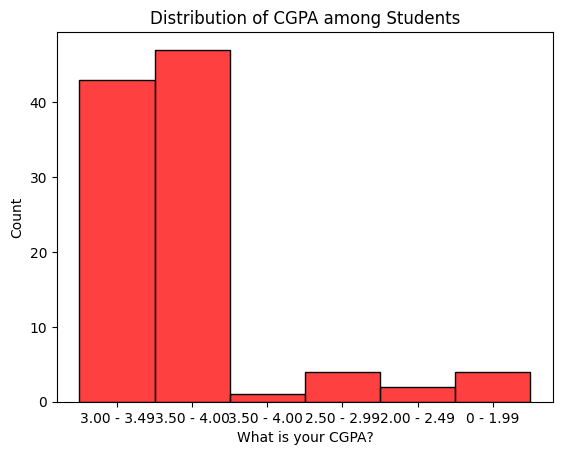

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the CGPA column
sns.histplot(df['What is your CGPA?'], bins = 20, color = 'red')

# Customizing the plot with a title
plt.title('Distribution of CGPA among Students')

plt.show()


🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders
Objective:
Use a bar plot to compare the proportion of students experiencing anxiety across different genders.

Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.

Tasks:

Import necessary libraries.
Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.
Customize your plot with an appropriate color palette.
Add a title to your plot.
Display the plot.


In [ ]:
# Group by gender and  yes/no anxiety so we can count at first
# After grouping the data, we use .size() to count the number of occurrences in each group.
# Logic: .size() counts the number of rows within each group.
# For example, if 50 "Female" students reported "Yes" to having anxiety, it returns 50 for that group.

anxiety_counts = df.groupby(['Choose your gender', 'Do you have Anxiety?'])
anxiety_counts.head()

anxiety_counts = df.groupby(['Choose your gender', 'Do you have Anxiety?']).size()
anxiety_counts

anxiety_counts = df.groupby(['Choose your gender', 'Do you have Anxiety?']).size().reset_index(name='count')
anxiety_counts


,Choose your gender,Do you have Anxiety?,count
0,Female,No,51
1,Female,Yes,24
2,Male,No,16
3,Male,Yes,10


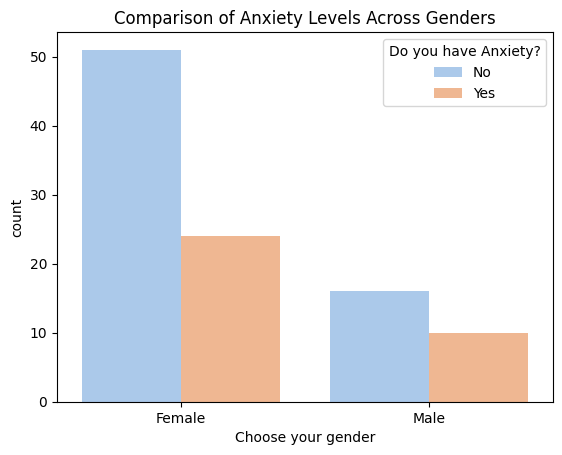

In [ ]:
# Create a bar plot using Seaborn
sns.barplot(x='Choose your gender', y='count', hue='Do you have Anxiety?', data=anxiety_counts, palette='pastel')

plt.title('Comparison of Anxiety Levels Across Genders')
plt.show()

🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks
Objective:
Create a scatter plot to explore if there’s any visible relationship between students’ age and the occurrence of panic attacks.

Dataset Overview: The dataset records students’ ages and their responses to whether they have experienced panic attacks.

Tasks:

Import necessary libraries.
Use Seaborn’s scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).
Customize the scatter plot to improve readability.
Add a title.
Display the plot.


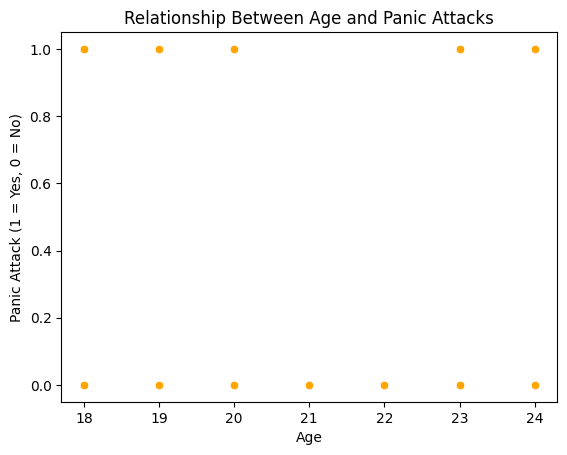

In [ ]:
# Convert 'Do you have Panic attack?' responses to numeric: Yes -> 1, No -> 0
df['Panic_Attack_Numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Create the scatter plot
sns.scatterplot(x='Age', y='Panic_Attack_Numeric', data=df, color='orange')

# Add labels and a title for readability
plt.title('Relationship Between Age and Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Panic Attack (1 = Yes, 0 = No)')


# Display the plot
plt.show()

# NOTE TO CHECKERS
#This task doesn't make sense but okay... why using scatter plot, maybe I made the mistake?

🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot
Objective:
Utilize Seaborn’s pairplot function to visualize the pairwise relationships and distributions across multiple variables in the dataset.

Scenario: You’re interested in understanding the relationships between students’ ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.

Tasks:

Select a subset of columns relevant to the exercise: Age, CGPA, Depression, Anxiety, and Panic attacks. Assume these columns are appropriately coded as numerical values for simplicity.
Use Seaborn’s pairplot to visualize pairwise relationships and distributions.
Customize the plot with a hue based on one of the mental health conditions to differentiate the data points.

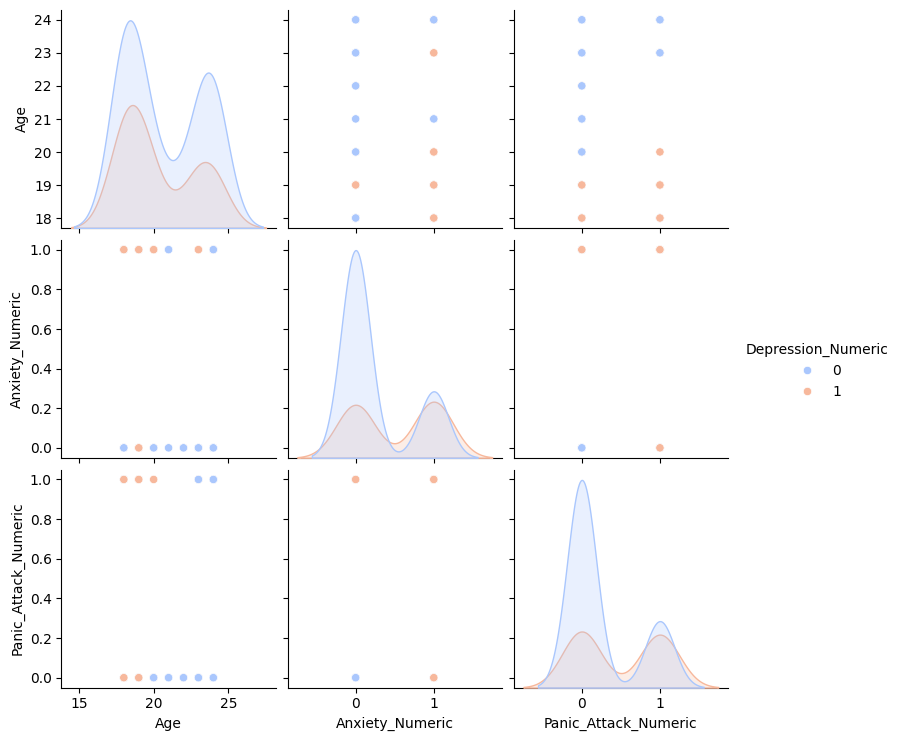

In [ ]:
# Convert relevant columns to numerical values for mental health conditions
df['Depression_Numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['Anxiety_Numeric'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Panic_Attack_Numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Select a subset of relevant columns
subset = df[['Age', 'What is your CGPA?', 'Depression_Numeric', 'Anxiety_Numeric', 'Panic_Attack_Numeric']]

# Use Seaborn’s pairplot to visualize pairwise relationships
sns.pairplot(subset, hue='Depression_Numeric', palette='coolwarm')

plt.show()


🌟 Exercise 5: Creating a Heatmap to Visualize Correlations
Objective:
Use Seaborn to create a heatmap that visualizes the correlation matrix of students’ age, CGPA, and mental health status indicators.

Scenario: You aim to identify any potential correlations between students’ age, CGPA, and their self-reported status on depression, anxiety, and panic attacks to find patterns that might need further investigation.

Tasks:

Calculate the correlation matrix for the selected subset of your dataset.
Use Seaborn’s heatmap function to visualize the correlation matrix.
Customize the heatmap for better readability (e.g., annotating the correlation coefficients).

In [ ]:
print(df.columns)


Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?', 'Panic_Attack_Numeric',
       'Depression_Numeric', 'Anxiety_Numeric'],
      dtype='object')


In [ ]:
#creating missing columns
df['CGPA_Numeric'] = df['What is your CGPA?'].map({
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
})

# and convert them to numeric
df['Depression_Numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['Anxiety_Numeric'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['Panic_Attack_Numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})


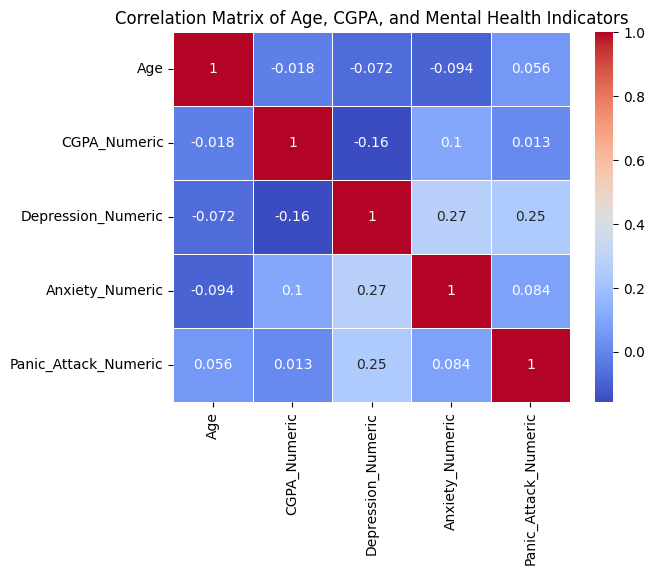

In [ ]:
# Select relevant columns for the correlation matrix
subset = df[['Age', 'CGPA_Numeric', 'Depression_Numeric', 'Anxiety_Numeric', 'Panic_Attack_Numeric']]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap - basically color the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title for better understanding
plt.title('Correlation Matrix of Age, CGPA, and Mental Health Indicators')

# Display the plot
plt.show()


🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid
Objective:
Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid.

Scenario: You are interested in exploring how students’ CGPA distributions vary among those who have reported depression versus those who haven’t.

Tasks:

Use Seaborn’s FacetGrid to create a grid of histograms for CGPA, segmented by depression status.
Map a histogram plot to each facet with appropriate customizations.
Add titles and labels for clarity.

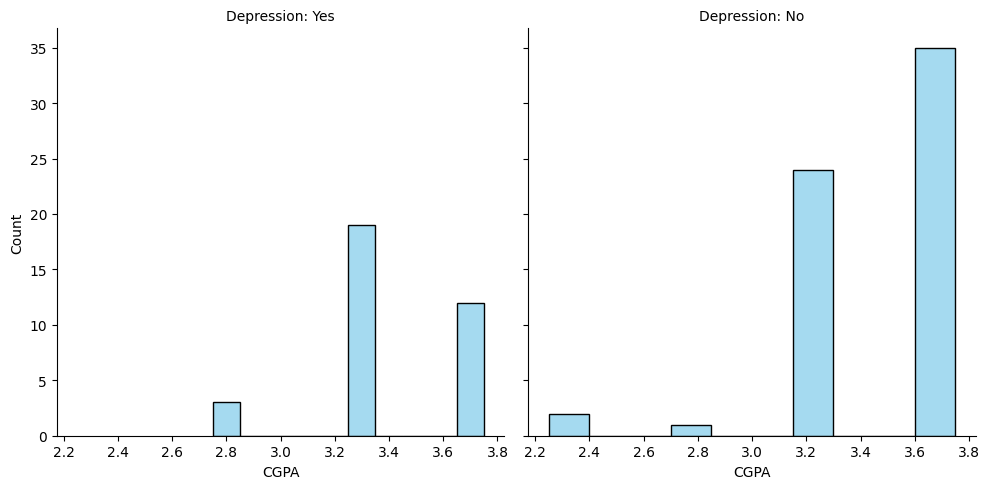

In [ ]:
# Create a FacetGrid segmented by depression status (using Yes/No values directly)
g = sns.FacetGrid(df, col='Do you have Depression?', height=5, aspect=1)

# Map a histogram for CGPA to each facet
g.map(sns.histplot, 'CGPA_Numeric', bins=10, color='skyblue')

# Add titles and labels
g.set_axis_labels('CGPA', 'Count')
g.set_titles('Depression: {col_name}')

plt.show()